# Capstone Project

Raul Lima Alves


data scientist

## This notebook is used only for the capstone project

In [1]:
import pandas as pd
import numpy as np

## Reading the table from wikipedia using pandas read_html

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M',header=0)[0]
df.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


## Removing lines with Borough Not assigned

In [3]:
df = df.drop(df[df['Borough'] == 'Not assigned'].index)
df.head()

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


## If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.

In [4]:
df[df['Neighborhood'] == 'Not assigned']['Neighborhood'] = df['Borough']
df.head()

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


## Group by postal code

In [5]:
df = df.groupby(['Postal Code', 'Borough'])['Neighborhood'].apply(lambda x: ','.join(x)).reset_index()
df

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [6]:
print(df.shape)

(103, 3)


## Acquiring geo info

In [28]:
locations = pd.read_csv('http://cocl.us/Geospatial_data')
locations.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [48]:
#bigdata = df.join(locations, lsuffix='_caller', rsuffix='_other')
bigdata = df.join(locations.set_index('Postal Code'), on='Postal Code')
bigdata

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [49]:
bigdata.shape

(103, 5)

## Clustering

### Defining function for making plot

In [109]:
def make_plot(k_means_labels, k_means_cluster_centers, title='KMeans', X=None, n_clusters=3):

    fig = plt.figure(figsize=(15, 10))
    colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

    ax = fig.add_subplot(1, 1, 1)

    #for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
    for k in range(n_clusters):
        col = colors[k]
        my_members = (k_means_labels == k)
        cluster_center = k_means_cluster_centers[k]
        ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
        ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())
    plt.show()

## Clustering regions with toronto word Borough

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.cluster import KMeans
df_test = bigdata.drop(bigdata[~bigdata.Borough.str.contains('Toronto')].index)
df_test.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


## Dropping unecessary data

In [99]:
df_test = df_test.drop(['Postal Code', 'Borough', 'Neighborhood'], axis=1)
df_test.head()

,Latitude,Longitude
37,43.676357,-79.293031
41,43.679557,-79.352188
42,43.668999,-79.315572
43,43.659526,-79.340923
44,43.728020,-79.388790


## Normalizing the data

In [101]:
from sklearn.preprocessing import StandardScaler

X = df_test.values
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[ 0.39793749,  2.61964756],
       [ 0.53600121,  1.01941327],
       [ 0.08040863,  2.00991342],
       [-0.32834143,  1.32413968],
       [ 2.62714635,  0.02929996],
       [ 1.96828767, -0.00877123],
       [ 2.08186867, -0.42754079],
       [ 1.60468436,  0.02929996],
       [ 0.96823293,  0.18160095],
       [ 0.83179593, -0.27526956],
       [ 0.53623853,  0.33391005],
       [ 0.03590049,  0.60047059],
       [-0.05501868,  0.18160095],
       [-0.55554658,  0.79089146],
       [-0.43033262,  0.29583074],
       [-0.67489659,  0.39102765],
       [-0.96499134,  0.44814526],
       [-0.39621906,  0.06737385],
       [-0.71471013,  0.14352435],
       [-1.13564978,  0.21967755],
       [-0.86117495,  0.22443577],
       [-0.81708966,  0.27203152],
       [ 1.92270943, -0.7320562 ],
       [ 1.28638314, -0.57980391],
       [ 0.24054304, -0.42754079],
       [-0.19155492, -0.27526956],
       [-0.60103421, -0.27526956],
       [-1.64778475, -0.12299021],
       [-0.89317422,

[11  8  3  3 14 12  4 12 13  1 13  0  0  0  0  6  6  0  6  6  6  6  4  1
 10 10 10  9  6  6  7  7  5  5  2  2  2 10  3]


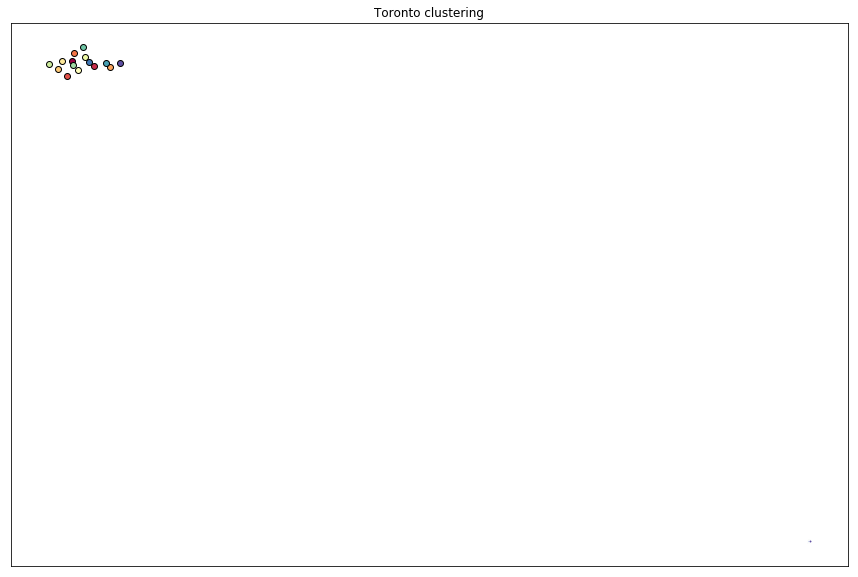

In [110]:
num_clusters = 15

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
print(k_means_labels)

make_plot(k_means_labels, k_means_cluster_centers, 'Toronto clustering', X, num_clusters)